# LROSE Wind Tutorial

---

This interactive tutorial takes you through the steps of how to run [FRACTL](http://wiki.lrose.net/index.php/FRACTL) and [SAMURAI](http://wiki.lrose.net/index.php/SAMURAI). FRACTL is a fast traditional solver with integrated interpolation using LROSE infrastructure, and it is able to perform both gridding and multi-Doppler synthesis for airborne radars and multiple ground-based radars. This is different than Radx2Grid which is only capable of gridding data for a single ground-based radar. FRACTL adopts techniques from older REORDER and CEDRIC software, but with some new improvements. In contrast to the older tools, in which interpolation is followed by synthesis, FRACTL does both steps together. FRACTL doesn’t require the CfRadial file with an aggregation of the sweeps, which is different than Radx2Grid. FRACTL performs a nearest neighbor interpolation of the reflectivity instead of bilinear interpolation in Radx2Grid. It combines the Doppler velocities together using the traditional 'normal' equations but with singular value decomposition of raw velocities in spherical space rather than Cramer's rule in gridded space like CEDRIC. 

SAMURAI is a variational analysis technique that is described in [Bell et al. (2012)](https://doi.org/10.1175/JAS-D-11-0276.1), [Foerster et al. (2014)](https://doi.org/10.1175/MWR-D-13-00313.1), [Foerster and Bell (2017)](https://doi.org/10.1175/JTECH-D-17-0073.1), [Cha and Bell (2021)](https://doi.org/10.5194/amt-14-3523-2021), [Cha and Bell (2023)](https://github.com/csu-tropical/csu-tropical/blob/master/Publications/papers/Cha_Bell_JTECH_2023.pdf), and other publications. The SAMURAI analysis yields a maximum likelihood estimate of the atmospheric state for a given set of observations and error estimates by minimizing a variational cost function. SAMMURAI employs a finite element approach using a series of overlapping cubic B-spline basis functions. 
This approach offers several advantages over a conventional grid-point representation, including:

- Allowing for a scaled-controlled analysis that can incorporate multiple spatial filters in the background error covariance and analytic spatial derivatives in observational space.
- No need to interpolate irregular data distributions to a Cartesian grid, and the data can be used in the variational minimization in their native locations.
- Spatial derivative constraints are considered as pseudo-observations, which can be implicitely integrated during the cost function minimmization at any point in their native coordinate.

It has more features and more development than FRACTL, and is generally recommended over the former for publication-quality analysis. The two programs together provide a powerful combination to produce high quality multi-Doppler wind fields from ground-based, airborne, or mixed configurations.

<div>
<img src="../../images/samurai.png" width="700"/>
</div>

---


## Tutorial Overview

### 1. Setup 

#### QC-ed input data, a parameter file, and a center file:

**a. QC-ed radar data files are provided:**
| CDV | PBE |
| -------- | ------- |
| cfrad.20180107_004225.662_to_20180107_004240.662_CREU_DEL_SUR.nc | cfrad.20180107_004230.125_to_20180107_004245.125_PUIG_BER_SUR.nc |
| cfrad.20180107_004244.092_to_20180107_004259.092_CREU_DEL_SUR.nc | cfrad.20180107_004247.823_to_20180107_004301.823_PUIG_BER_SUR.nc |
| cfrad.20180107_004301.347_to_20180107_004316.347_CREU_DEL_SUR.nc | cfrad.20180107_004304.358_to_20180107_004319.358_PUIG_BER_SUR.nc |
| cfrad.20180107_004318.235_to_20180107_004332.235_CREU_DEL_SUR.nc | cfrad.20180107_004322.342_to_20180107_004337.342_PUIG_BER_SUR.nc |
| cfrad.20180107_004335.672_to_20180107_004350.672_CREU_DEL_SUR.nc | cfrad.20180107_004340.760_to_20180107_004355.760_PUIG_BER_SUR.nc |
| cfrad.20180107_004351.684_to_20180107_004406.684_CREU_DEL_SUR.nc | cfrad.20180107_004359.360_to_20180107_004414.360_PUIG_BER_SUR.nc |
| cfrad.20180107_004409.010_to_20180107_004423.010_CREU_DEL_SUR.nc | cfrad.20180107_004416.403_to_20180107_004431.403_PUIG_BER_SUR.nc |
| cfrad.20180107_004426.910_to_20180107_004441.910_CREU_DEL_SUR.nc | cfrad.20180107_004435.419_to_20180107_004450.419_PUIG_BER_SUR.nc |
| cfrad.20180107_004444.218_to_20180107_004459.218_CREU_DEL_SUR.nc | cfrad.20180107_004453.420_to_20180107_004508.420_PUIG_BER_SUR.nc |
| cfrad.20180107_004501.640_to_20180107_004516.640_CREU_DEL_SUR.nc | cfrad.20180107_004510.725_to_20180107_004525.725_PUIG_BER_SUR.nc |
| cfrad.20180107_004519.306_to_20180107_004534.306_CREU_DEL_SUR.nc | cfrad.20180107_004529.202_to_20180107_004544.202_PUIG_BER_SUR.nc |
| cfrad.20180107_004535.929_to_20180107_004550.929_CREU_DEL_SUR.nc | cfrad.20180107_004546.178_to_20180107_004601.178_PUIG_BER_SUR.nc |
| cfrad.20180107_004554.649_to_20180107_004608.649_CREU_DEL_SUR.nc | cfrad.20180107_004605.722_to_20180107_004620.722_PUIG_BER_SUR.nc |
| cfrad.20180107_004612.565_to_20180107_004626.565_CREU_DEL_SUR.nc | cfrad.20180107_004625.394_to_20180107_004640.394_PUIG_BER_SUR.nc |
| cfrad.20180107_004630.909_to_20180107_004645.909_CREU_DEL_SUR.nc | cfrad.20180107_004645.119_to_20180107_004700.119_PUIG_BER_SUR.nc |
| cfrad.20180107_004649.801_to_20180107_004704.801_CREU_DEL_SUR.nc | cfrad.20180107_004704.310_to_20180107_004719.310_PUIG_BER_SUR.nc |

*The QC process is not included in this tutorial. An example of one type of QC can be found in the QC tutorial and HawkEdit/solo are another tool to use for QC-ing data.

**b. A terrain file for SAMURAI is provided in order to activate wind retrievals over complex terrain**
- terrain.hgt

*If a user wishes to retrieve wind flows over complex terrain, a **terrain.hgt** is required to be included in the data folder. More details about how to generate a **terrain.hgt** can be found in Section X.

### 2. Basic FRACTL and SAMURAI "how to"

Both FRACTL and SAMURAI are run on the command line, using simple commands like this:

* <code lang="bash">fractl -params /path/to/fractl.params</code>
* <code lang="bash">samurai -params /path/to/samurai.params</code>

All of the information about how FRACTL and SAMURAI should analyze data (e.g., paths to input data, variable names, grids, filters) is defined in parameter files for each application. Therefore, most of the work to run FRACTL and SAMURAI goes into setting up the parameter files and placing files in the correct location.

FRACTL requirements:
* radar data (CfRadial)
* parameter file

SAMURAI requirements:
* data (e.g., radar data, radiosondes, in-situ aircraft data)
* center file
* parameter file
* optional: terrain file
* optional: background file

#### How to set up FRACTL

**a. Set up directory structure:**

All data that FRACTL will use need to be in the same directory. This tutorial will set up input and output directories for the initial FRACTL exercises. *For additional FRACTL runs, we recommend creating new input and output directories to keep all analyses separate.*

**b. Parameter files:**

FRACTL's parameter file contains information about data I/O, the cartesian grid, and variable names. In this tutorial, the user will create their own parameter file from scratch and fill in the important parameters.

#### How to set up SAMURAI

**a. Set up directory structure:**

All data and the center file defining the Cartesian grid that SAMURAI will use need to be in the same directory. This tutorial will set up input and output directories for the initial SAMURAI exercises. *For additional SAMURAI runs, we recommend creating new input and output directories to keep all analyses separate.*

**b. Center file:**

The .cen file will be generated by the user through the provided Perl script. SAMURAI uses the center file to define the Cartesian frame of reference for the analysis, which be either be static or moving. It can be used to time-space correct the position of radar data in a moving storm system. It also sets the temporal limits for data to be included in the analysis. The center files are named according to the following convention: YYYYMMDD.cen
* Provided: Generate_center.pl

**c. Parameter files:**
SAMURAI's parameter file contains information about data I/O, the cartesian grid, variable names, filters, and other scientific choices. In this tutorial, the user will create their own parameter file from scratch and fill in the important parameters.


#### Environment and packages¶

First, we import the required python packages to run this notebook. Most of the LROSE processing can be done with the os package and shell commands. 

In [1]:
import os
#### Need to modify later
os.environ['LROSE_DIR'] = '/usr/local/lrose/bin'


######### will need to update with directories loading in data #######
#### might not stream them to retain name conventions ######


We will copy the required data to one directory as SAMURAI requires and organize the directory by performing the following commands:

In [2]:
# make parameter directory
!mkdir -p ./lrose_params

# make subdirectories for samurai and fractl input
!mkdir -p ./fractl_input
!mkdir -p ./samurai_input

# create SAMURAI output directory
!mkdir -p ./output_sam

# create FRACTL output directory
!mkdir -p ./output_frac

# copy raw files to respective input directories
######## UPDATE LATER TO MOVE FILES
# !cp ${RAW_DIR}/wind_guided/*.nc ${BASE_DIR}/data/wind_guided/input
# !cp ${RAW_DIR}/wind_guided/Generate_center.pl ${BASE_DIR}/params/wind_guided


### 2. Prepare data for analysis

In this tutorial, the provided data have already been QC-ed. For a standard procedure, users are recommended to perform the following procedure:

* Convert radar data from level 2 or other native format to CfRadial using RadxConvert 
    - SAMURAI can also incorporate non-radar data, and can read many commonly used formats. All data files in the <code lang="bash">input</code> directory will be included in the analysis. The read subroutine for each datatype is determined by the file suffix.

* Quality-controlled raw data by desired QC-tools. See the QC tutorial for an example of how QC can be done; HawkEdit and Solo can also be used to QC data.

### 3. Setup the FRACTL parameter file

#### 3.1 Generate the parameter file
First, we need to generate the parameter file! LROSE applications use a standard <code lang="bash">-print_params</code> flag to generate parameter files with the defaults. We just need to specify the location and name of the parameter file. We have already set up a directory where you can place the parameter files. Feel free to change the name of the file if you prefer. 

<div class="alert alert-block alert-info"> <b>Task: Create the FRACTL parameter file.</b> 
    <br>
    Copy the following command into the open cell below and run it!
    <br>
    <code lang="bash">!${LROSE_DIR}/fractl -print_params > ./lrose_params/fractl_params</code>
</div>


Now that we have generated the parameter file, we can inspect the file. In JupyterHub, you can edit the file either in a terminal with vi or by opening the text file via the lefthand menu - whichever you prefer! The file should be located here: /home/jovyan/lrose-hub/params/wind_guided

<div class="alert alert-block alert-info"> <b>Task: Open the parameter file for modification.</b> 
</div>

#### 3.2 Modify the parameter file

Now we will step through and edit the parameter file.

First, we'll start with the parameters associated with the input/output data directories and filenames.

| Parameter | Line # | Description |
| --- | --- | --- |
|inDir| 391 |The input data directory. It can be a relative path, but an absolute path is more certain.|
|fileRegex| 399 |A regular expression to identify the files used for analysis. Usually ^cfrad, to find CfRadial files.|
|outNc| 426 |The output directory where the analysis will go.|
|outTxt| 417 |the name of the text file that will contain the verification of grid results.|

<div class="alert alert-block alert-info"> <b>Task: change the inDir, fileRegex, and outNc parameters.</b> 
    <br>
    Refer to the table above to find the parameters in the text file.
    <ul>
<li> <code lang="bash">inDir = "./fractl_input"</code>
<li> <code lang="bash">fileRegex = "^cfrad"</code>
<li> <code lang="bash">outNc = "./output_frac/"</code>
<li> <code lang="bash">outTxt = "./output_frac/fractl_output.txt"</code>
        </ul>
</div>


---

Next, we'll define the cartesian grid.

| Parameter | Line # | Description |
| --- | --- | --- |
|zGrid, yGrid, xGrid| 174, 182, 190 |These determine the grid spacing and size of the domain. Provide either the grid spacing to determine the max and min from the data or provide "min,max,incr" for each parameter.|
|projLat0, projLon0| 229, 237 |The origin is an arbitrarily chosen point, but should be relevant for your objective. For example, it can be the geographical center of your multi-radar domain, the physical location of a radar for a single-radar domain, or the location of a feature of interest within your dataset (such as storm center). The latitude and longitude of your chosen origin should be given in decimal degrees.|
|radarAlt| 245 |Altitude of the radar (km). Sometimes mobile radars have the altitude entered in m, which can often cause errors in FRACTL.|

<div class="alert alert-block alert-info"> <b>Task: set up the FRACTL grid using the following values.</b> 
    <br>
    We have provided the grid information for you. In this example, we will make a small box around the Goshen tornado with 100 m grid spacing. Since the radar had limited elevation angles, we restrict the vertical grid to 5-km altitude. Normally, you want to make the domain taller than your data.
    <ul>
<li> <code lang="bash">zGrid = "0,10,0.5"</code>
<li> <code lang="bash">yGrid = "10,40,0.5"</code>
<li> <code lang="bash">xGrid = "10,35,0.5"</code>
<li> <code lang="bash">projLat0 = 41.601666</code>
<li> <code lang="bash">projLon0 = 1.402777</code>
<li> <code lang="bash">radarAlt = 0.631</code>
        </ul>
</div>


---

Finally, we'll define the variable names so that FRACTL knows which variables to use in the analysis.

| Parameter | Line # | Description |
| --- | --- | --- |
|radialName| 440 |Variable name for the Doppler velocity.|
|dbzName| 448 |Variable name for the radar reflectivity.|
|ncpName| 456 |Variable name for the normalized coherent power. This variable can be used to do some simple QC thresholding. If you don't have NCP or SQI in your data then just point this to any other variable and select a value above which all data will be included.|
|minDbz| 58 |Any values below the minimum reflectivity value will be tossed out. Example: -20.|
|minNcp| 69 |Any values below the minimum NCP will be tossed out. Some radars do not have NCP, so the NCP variable can be replaced by any other variable to perform a simple quality control (e.g., SW < -1, dBZ < -20). This is generally intended for quick realtime quality control process.|

<div class="alert alert-block alert-info"> <b>Task: look for the variable names for reflectivity, velocity, and whether NCP exists in each file.</b> 


We can use a couple applications to examine the variable names in our radar files (e.g., ncdump or RadxPrint). To limit the application output, you can also pipe information to commands like <code lang="bash">grep</code> or <code lang="bash">head</code>. Some example commands you can try are listed below.
 
<i>Copy them as is to try them out in the next Jupyter cell. If you prefer to run them in a terminal window, remove the "!" symbol, which is just for Jupyter notebooks.</i>

<code lang="bash">!ncdump -h $./fractl_input/cfrad.20180107_004225.662_to_20180107_004240.662_CREU_DEL_SUR.nc</code>

<code lang="bash">!ncdump -h ./fractl_input/cfrad.20180107_004230.125_to_20180107_004245.125_PUIG_BER_SUR.nc</code>

<code lang="bash">!${LROSE_DIR}/RadxPrint -f ./fractl_input/cfrad.20180107_004225.662_to_20180107_004240.662_CREU_DEL_SUR.nc</code>
 
<code lang="bash">!${LROSE_DIR}/RadxPrint -f ./fractl_input/cfrad.20180107_004230.125_to_20180107_004245.125_PUIG_BER_SUR.nc</code>

</div>


<div class="alert alert-block alert-info"> <b>Task: define the radar variable names in the parameter file based on the output discovered above.</b> 
</div>

**Congrats! You've finished setting up the FRACTL parameter file!**

### 4. Run FRACTL

After modifying the parameter file, direct to the parameter file by using the *-params* flags

In [ ]:
!${LROSE_DIR}/fractl -params ./lrose_params/fractl_params


### 5. Plot FRACTL results

#### Environment and packages
Import the packages to plot the FRACTL output. These are pre-installed for this tutorial, but if you run this notebook on your own computer you may need to install them yourself using pip or conda.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import xarray as xr
import matplotlib as mpl
import cartopy.crs as ccrs
from metpy.plots import ctables
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
mpl.rcParams['figure.dpi'] = 300


Load the netcdf file

In [11]:
inDir = "./output_frac/20180107/"
file = "ncf_20180107_004719.nc"
ds_radar = xr.open_dataset(inDir+file).squeeze()
ds_radar.load()


<xarray.Dataset>
Dimensions:          (z0: 21, y0: 61, x0: 51)
Coordinates:
    time             datetime64[ns] 2018-01-07T00:47:19.309999872
  * z0               (z0) float64 0.0 500.0 1e+03 ... 9e+03 9.5e+03 1e+04
  * y0               (y0) float64 1e+04 1.05e+04 1.1e+04 ... 3.95e+04 4e+04
  * x0               (x0) float64 1e+04 1.05e+04 1.1e+04 ... 3.45e+04 3.5e+04
Data variables: (12/14)
    grid_mapping_0   int32 0
    lat0             (y0, x0) float64 41.69 41.69 41.69 ... 41.96 41.96 41.96
    lon0             (y0, x0) float64 1.523 1.529 1.535 ... 1.813 1.819 1.825
    start_time       float64 1.515e+09
    stop_time        float64 1.515e+09
    W                (z0, y0, x0) float32 nan nan nan nan ... nan nan nan nan
    ...               ...
    DBZ              (z0, y0, x0) float32 nan nan nan nan ... 5.5 nan nan nan
    NCP              (z0, y0, x0) float32 nan nan nan nan ... 5.5 nan nan nan
    conditionNumber  (z0, y0, x0) float32 nan nan nan nan ... 116.5 nan nan nan
    W_std            (z0, y0, x0) float32 nan nan nan nan ... nan nan nan nan
    V_std            (z0, y0, x0) float32 nan nan nan nan ... nan nan nan nan
    U_std            (z0, y0, x0) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  CF-1.5

In [12]:
## Get variables:
da_DBZ = ds_radar['DBZ']
da_U = ds_radar['U']
da_V = ds_radar['V']
da_W = ds_radar['W']
da_CN = ds_radar['conditionNumber']


Text(0.5, -0.1, '[dBZ]')

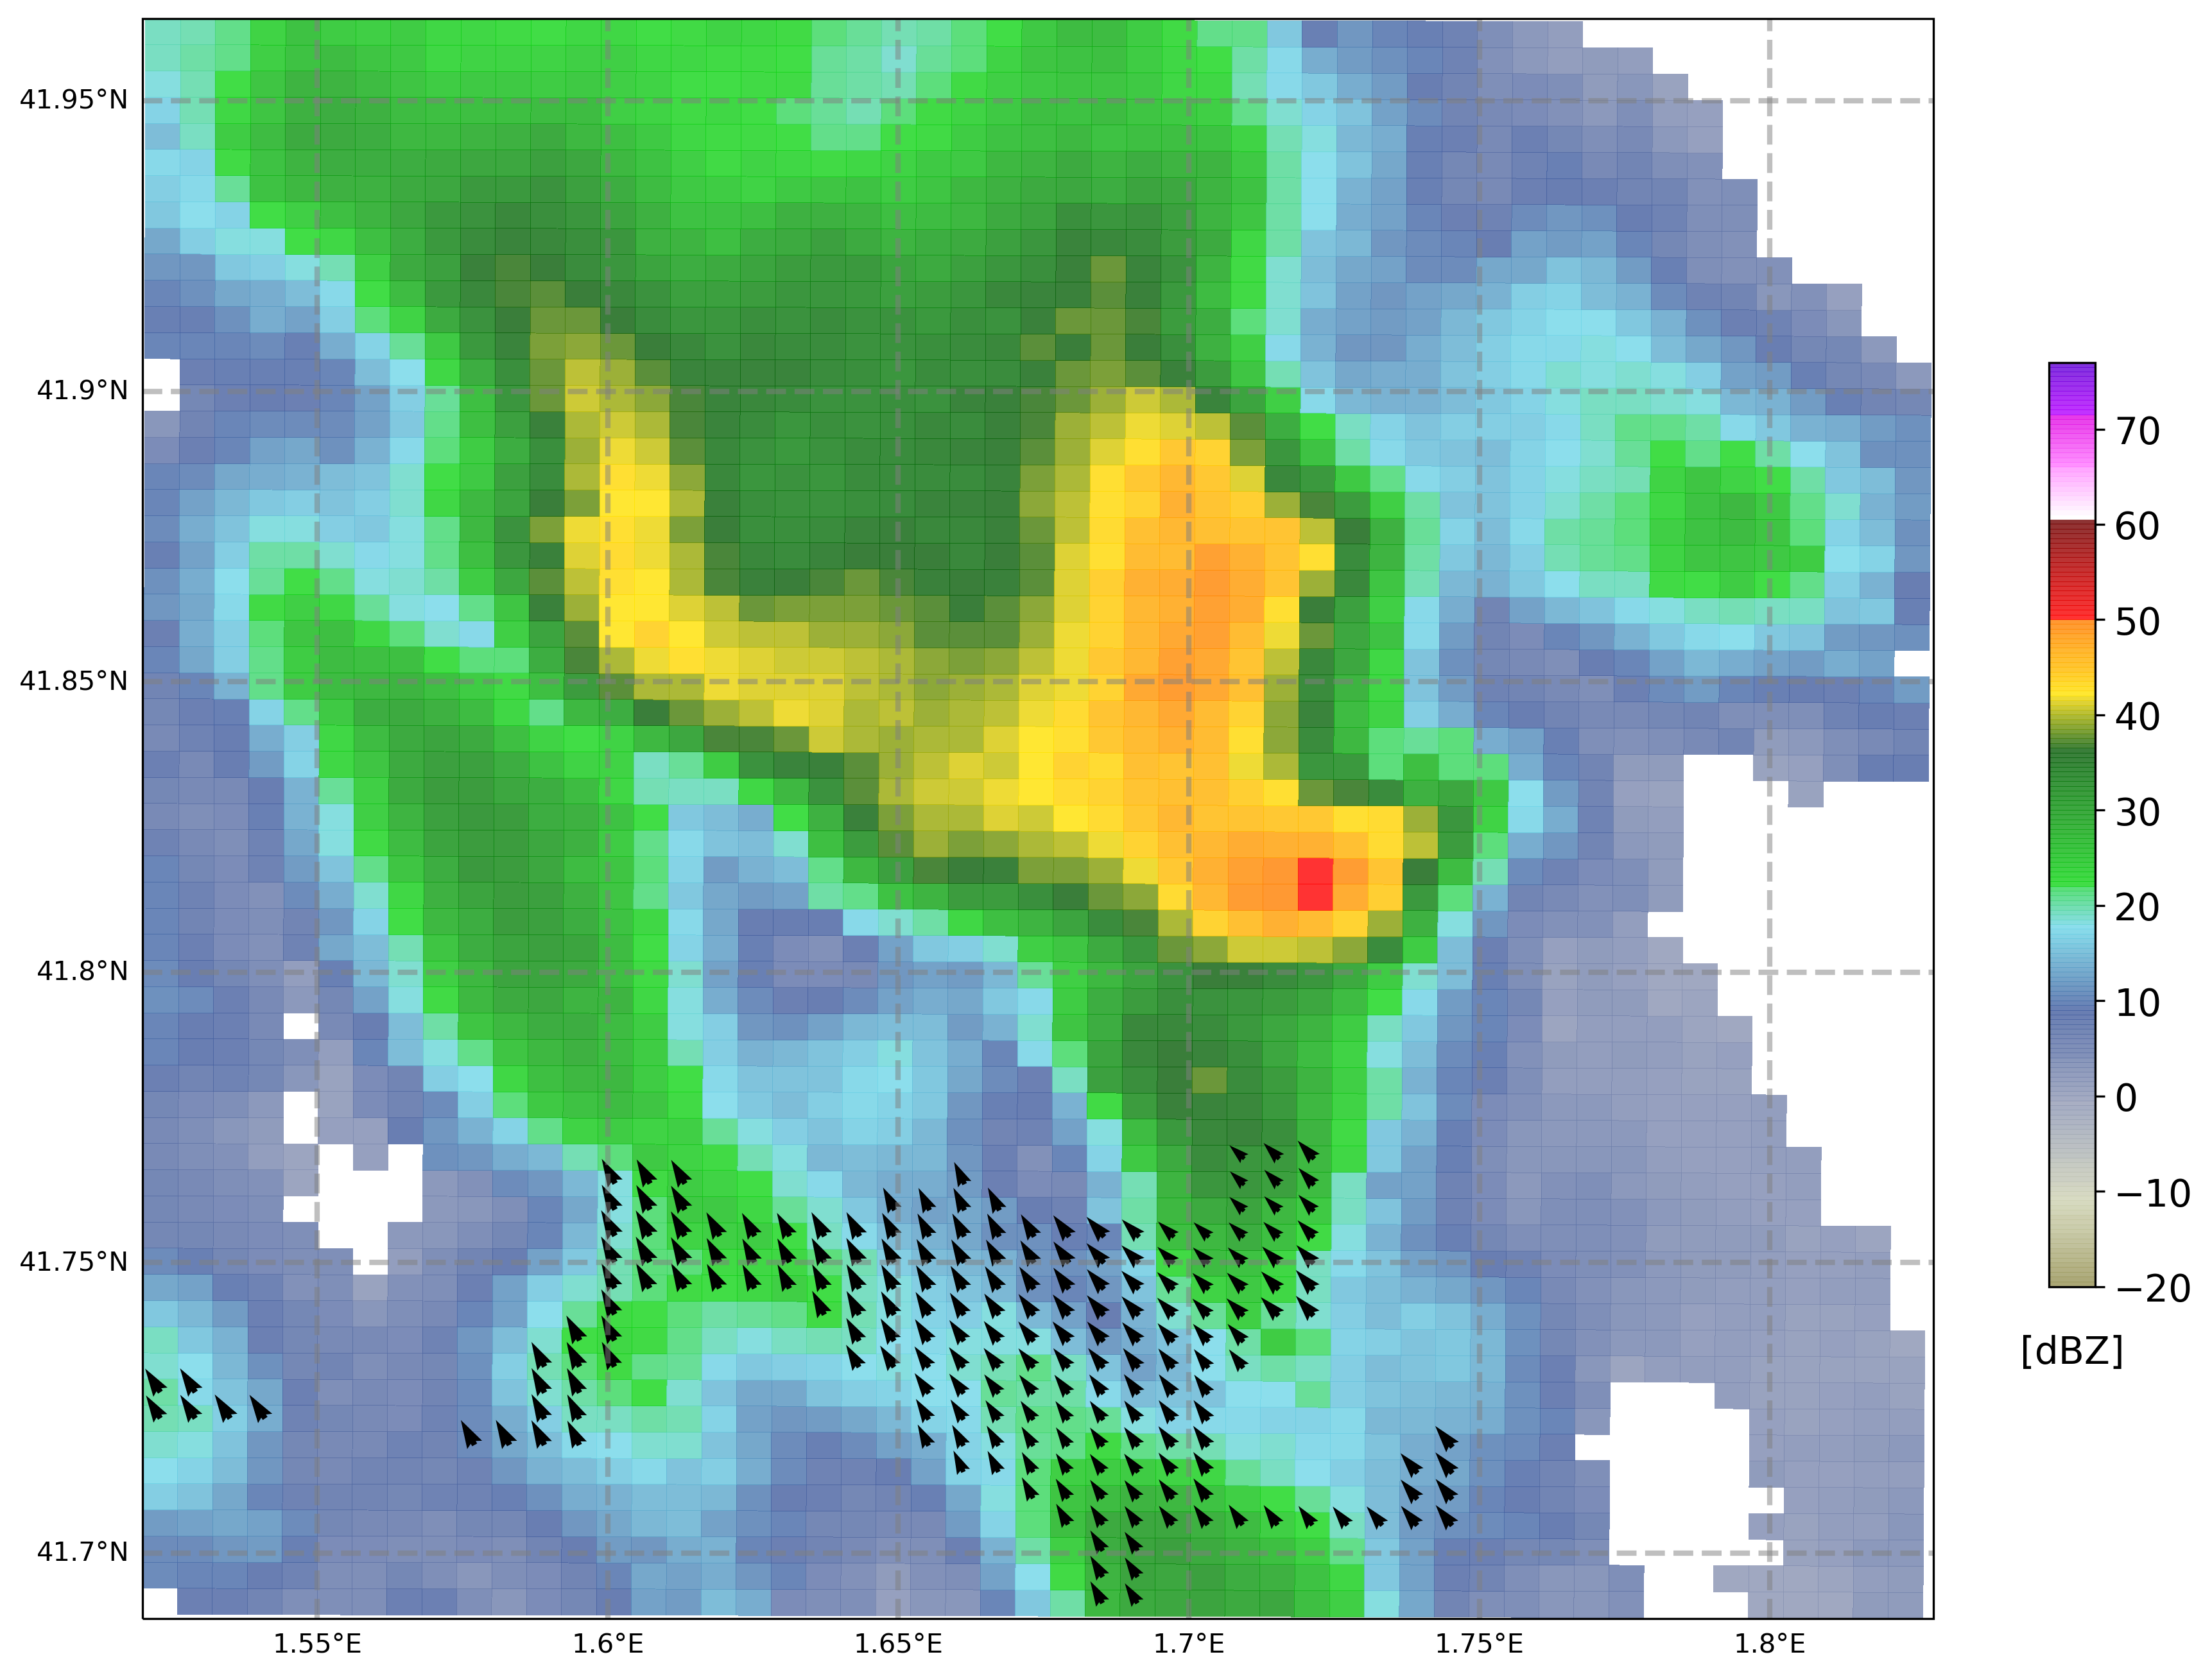

In [13]:
## Set NWS reflectivity colorbar:
ref_norm, ref_cmap = ctables.registry.get_with_steps('NWSStormClearReflectivity', -20, 0.5)
plotting_alt=1.5*1000 # altitude at 1.5 km
plotting_var = ds_radar.DBZ.sel(z0=plotting_alt).data
plotting_var_u = ds_radar.U.sel(z0=plotting_alt).data
plotting_var_v = ds_radar.V.sel(z0=plotting_alt).data
plotting_lon = ds_radar.lon0
plotting_lat = ds_radar.lat0

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
# stamen_terrain = cimgt.Stamen('terrain')
# ax.add_image(stamen_terrain, 8)
      
cf1 = ax.pcolormesh( plotting_lon, plotting_lat, plotting_var
                    , cmap=ref_cmap, norm=ref_norm
                    , alpha=0.8
                    , shading='auto'
                    , transform=ccrs.PlateCarree() 
                    )
step = 1
cf_q = ax.quiver( plotting_lon[::step, ::step], plotting_lat[::step, ::step]
                    , plotting_var_u[::step, ::step], plotting_var_v[::step, ::step]
                    , scale=1000
                    , width=0.004
                    , color='k'
                    , transform=ccrs.PlateCarree()
                    )

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

cbar_ax = fig.add_axes([0.95, 0.3, 0.02, 0.4])
cbar = fig.colorbar(cf1, cax=cbar_ax, fraction=0.04)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_title('[dBZ]', fontsize=14, y=-0.1)


### If you can see the above plot, then congratulations! You have successfully created and plotted a dual-Doppler analysis. Now let's try SAMURAI

### 6. Set the SAMURAI parameters

#### 6.1 Set up the center file
One difference between FRACTL and SAMURAI is the requirement of a centerfile, which allows for a moving domain. We will modify and run the Generate_center.pl perl script to generate a time-series of center locations by providing an estimation of the moving speed of the target and the reference location.

| Parameter | Line # | Description |
| --- | --- | --- |
|lat_origin, lon_origin| 13, 14 |Latitude and longitude of reference frame at origin time.|
|u, v| 15, 16 |Storm motion.|
|ymd| 17 |Date of initial time (YYYYMMDD).|
|hr, mn, sec| 18, 19, 20 |Initial hour, minute, second of track.|
|duration| 21 |Duration of track in seconds.|
|origintime| 22 |Time when the frame is at the latitude/longitude at the origin time in seconds from the initial time.|

<div class="alert alert-block alert-info"> <b>Task: open the Generate_center.pl script and modify the parameters for this case.</b> 

The script can be found here: ./Generate_center.pl
    
For lat_origin and lon_origin, use the values that we defined above in the FRACTL parameter file. 
    
For this example, we will use a stationary domain, so u and v can be set to zero.  

The initial time set by ymd, hr, mn, and sec should be set such that the data all occur after the initial time. CfRadial files often contain the start time of the data in their file names. Look at the two files we are using and see when the data starts. Set your initial time before that time - usually 5-10 seconds is sufficient.

Duration sets the length of the analysis. Similar to the initial time, look at the CfRadial filenames to determine the latest timestamp associated with the data. Then determine the number of seconds needed to encompass all the data from the two files. Feel free to round up a few seconds.

Origintime is less meaningful in a stationary nest, but for this example use 1.
</div>


#### 6.2 Generate the center file

<div class="alert alert-block alert-info"> <b>Task: run the Perl script to generate the center file and move the center file to the wind_guided input directory.</b> 
    <br>
First, we need to make the script executable so we can run it. Run the following command to change the permissions.
    
<code lang="bash">!chmod u+x ./Generate_center.pl</code>

Generate the .cen file in the input directory using the following command:
<code lang="bash">!Generate_center.pl</code>
</div>

Generate_center.pl creates the file in the directory containing this notebook. We just need to move it to the input directory, which we can do with the following command. Using either a terminal or the nagivation at the left of the notebook, double check that the file is now in the input directory.

In [ ]:
!mv ./*.cen ./samurai_input

#### 6.3 Generate the SAMURAI parameter file
Like FRACTL, SAMURAI uses the <code lang="bash">-print_params</code> flag to generate parameter files with the defaults. We just need to specify the location and name of the parameter file. We have already set up a directory where you can place the parameter files. Feel free to change the name of the file if you prefer. 

<div class="alert alert-block alert-info"> <b>Task: generate the SAMURAI parameter file.</b> 
<br>
Copy the following command into the open cell below and run it!
    
<code lang="bash">!${LROSE_DIR}/samurai -print_params > ./lrose_params/samurai_params</code>
</div>


#### 6.4 Modify the SAMURAI parameter file

Now we will step through and edit the parameter file.

First, we'll start with the parameters associated with the input/output data directories and filenames.

| Parameter | Line # | Description |
| --- | --- | --- |
|data_directory| 171 |The input data directory. It can be a relative path, but an absolute path is more certain.|
|output_directory| 181 |The output directory where the analysis will go.|

<div class="alert alert-block alert-info"> <b>Task: set the data directories.</b> 

Change the data_directory and output_directory parameters to the following.

<code lang="bash">data_directory = "./samurai_input"</code>

<code lang="bash">output_directory = "./output_sam"</code>
</div>


---
Next, we'll define the cartesian grid.

| Parameter | Line # | Description |
| --- | --- | --- |
|i_min, i_max, i_incr| 254, 260, 266 |Define the minimum and maximum extent and grid spacing in km of the first horizontal dimension (e.g., Cartesian 'x' dimension). For cylindrical analyses (RTZ mode), this is radius.|
|j_min, j_max, j_incr| 272, 278, 284 |Define the minimum and maximum extent and grid spacing of the second horizontal dimension (e.g., Cartesian 'y' dimension in km). For cylindrical analyses (RTZ mode), this is azimuth (degrees).|
|k_min, k_max, k_incr| 290, 296, 302 |Define the minimum and maximum extent and grid spacing in km of the vertical dimension (i.e., 'z' dimension). k_min should usually be 0.|

<div class="alert alert-block alert-info"> <b>Task: set up the SAMURAI grid.</b> 

Using the grid spacing and span that we used to set up FRACTL, fill out these 9 parameters in the SAMURAI parameter file. Since we are creating a Cartesian analysis, i, j, and k correspond to x, y, and z.

</div>


---
SAMURAI requires the user to set the background time. 

| Parameter | Line # | Description |
| --- | --- | --- |
|ref_time| 324 |This is the reference time to which all data will be time-space corrected. It must be a valid time in the centerfile or an error will occur. The time should be the same as the origin time corresponding to the latitude/longitude in the Perl center file script.|

<div class="alert alert-block alert-info"> <b>Task: define the reference time.</b> 

The reference time in SAMURAI should correspond to the same time as the origin time (*not* the start time) that was used in the Generate_center.pl script. The format is HH:MM:SS.

</div>


---
Next, we'll set some remaining parameters which define the radar variable names, radii of influence, and how much data is processed. 

| Parameter | Line # | Description |
| --- | --- | --- |
|radar_skip| 352 |This option can be used to skip beams in the radar data. When set to '1', all beams are used. Setting it to 2 speeds up the calculation and is useful for preliminary analysis. It should generally be set to 1 for final analysis.|
|radar_stride| 358 |This option sets the number of gates over which averaging occurs along the beam. A stride of '1' uses all data, and higher numbers average multiple gates of the given stride. Higher numbers speed up the calculation and can be used to thin the data to achieve desired spatial resolution of the input velocities.|
|radar_dbz| 382 |The name of the reflectivity field in the radar data.|
|radar_vel| 392 |The name of the Doppler velocity field in the radar data.|
|radar_sw| 398 |The name of the spectrum width field in the radar data. This value is used to set the observational error for the Doppler velocity. If you don't have spectrum width, you can point it at another variable (like NCP) or create a simple uniform field.|
|i_reflectivity_roi, j_reflectivity_roi, k_reflectivity_roi| 404, 410, 416 |These variables set the radius of influence for the reflectivity interpolation. They should be similar to the grid increments defined above.|
|mask_reflectivity| 428 |The analysis can be set to missing data where there is no reflectivity. If set to 'None' then no masking is performed. A numerical value will be used as a threshold for the masking, with all data at nodes having less than the given reflectivity value removed. If you are not using a background field then it is generally a good idea to set this to some small number (like -10 dBZ) since the winds are not valid if there is no radar data.|

<div class="alert alert-block alert-info"> <b>Task: fill out the radar-specific parameters</b> 

The radar_dbz and radar_vel parameters are the same names that were used in the FRACTL parameter file. The radar_sw parameter can be determined in a similar manner that we used earlier.

For the radii of influence, use a value of 0.5, similar to the grid spacings.

Finally, mask_reflectivity can be set to a low value to remove weak echo regions. A value around -25 dBZ is often sufficient.

</div>


---
Finally, we'll correct some default parameters.. 

| Parameter | Line # | Description |
| --- | --- | --- |
|load_background| 93 |A first guess of the analysis stored in the samurai_Background.in will be loaded. This can come from a model, sounding, or other data source if available. Most of the time it is not available so it should be set to FALSE.|
|output_latlon_increment| 1028 |SAMURAI can produce XYP analyses, where the vertical coordinate is pressure. This parameter sets the lat/lon increment.|
|output_pressure_increment| 1034 |SAMURAI can produce XYP analyses, where the vertical coordinate is pressure. This parameter sets the pressure level increment. Set to -1 for XYZ analyses. This will be made a default of -1 in a future release.|


<div class="alert alert-block alert-info"> <b>Task: fill out the radar-specific parameters</b> 

Some of the default parameters have not been fixed in this version of SAMURAI. Set <code lang="bash">load_background</code> to FALSE, and <code lang="bash">output_latlon_increment</code> and <code lang="bash">output_pressure_increment</code> to -1.

</div>

For a list of additional SAMURAI parameters, please refer to the appendix at the end of this notebook.


#### 6.5 Generate a terrain file

**a. Data source and structure of input terrain file**

Terrain data is chosen by the user and can be obtained from different sources such as model data, ASTER-DEM, SRTM, and others. Users are required to save the file as **terrain.hgt**. The subroutine for reading the file is determined by its suffix (hgt).

The terrain file data should be structured as follows:

Latitude Longitude Terrain-Height(m) dh/dx(unitless) dh/dy(unitless) X(km) Y(km)
```
41.692 	1.523 	636.789 	-0.002 	0.007 	10.0 	10.0
41.696 	1.523 	640.075 	-0.001 	0.006 	10.0 	10.5
41.701 	1.523 	642.975 	-0.001 	0.006 	10.0 	11.0
41.705 	1.523 	645.635 	-0.001 	0.005 	10.0 	11.5
41.71 	1.523 	647.869 	-0.0 	0.004 	10.0 	12.0
41.714 	1.523 	649.542 	0.0 	0.003 	10.0 	12.5
41.719 	1.523 	650.772 	0.001 	0.002 	10.0 	13.0
41.723 	1.523 	651.559 	0.002 	0.001 	10.0 	13.5
...
```
X and Y should match the desired output grid which corresponds to the "GRID DEFINITION SECTION" in the parameter file. 

*In this tutorial, the terrain file is provided.  


###

**b. Modify the parameter file related to the terrain**

---

When a terrain file is included in the directory,  users can determine the strength of the boundary condition by changing the magnitude of **neumann_u_weight**, **neumann_v_weight**, and **dirichlet_w_weight**. The **neumann_u_weight**, **neumann_v_weight** regulate the impermeability of the horizontal flow as it encounters the terrain, and the **dirichlet_w_weight** governs the vertical motion generated by topographic influences when horizontal flow interacts with the terrain.

| Parameter | Line # | Description |
| --- | --- | --- |
|neumann_u_weight| 1461 |This option sets the strength of the impermeability of the horizontal flow in u direction as it encounters the terrain.|
|neumann_v_weight| 1473 |This option sets the strength of the impermeability of the horizontal flow in v direction as it encounters the terrain.|
|dirichlet_w_weight| 1485 |This option sets the strength of the topographic forcing when horizontal flow interacts with the terrain.|

*The default value is 0.1. However, the choice of settings must be carefully evaluated on a case-by-case basis and their interpretations should be made accordingly when drawing scientific conclusions.*

Now let's take a look at a raw terrain map (.tif)

In [29]:
import rasterio
import numpy as np

file_path = './oro_MED.tif'
terrain = rasterio.open(file_path)

In [30]:
with terrain as src:
    band1 = src.read(1)
    print('Band1 has shape', band1.shape)
    height = band1.shape[0]
    width = band1.shape[1]
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rasterio.transform.xy(src.transform, rows, cols)
    lons= np.array(xs)
    lats = np.array(ys)
    print('lons shape', lons.shape)

Band1 has shape (3600, 4000)
lons shape (3600, 4000)


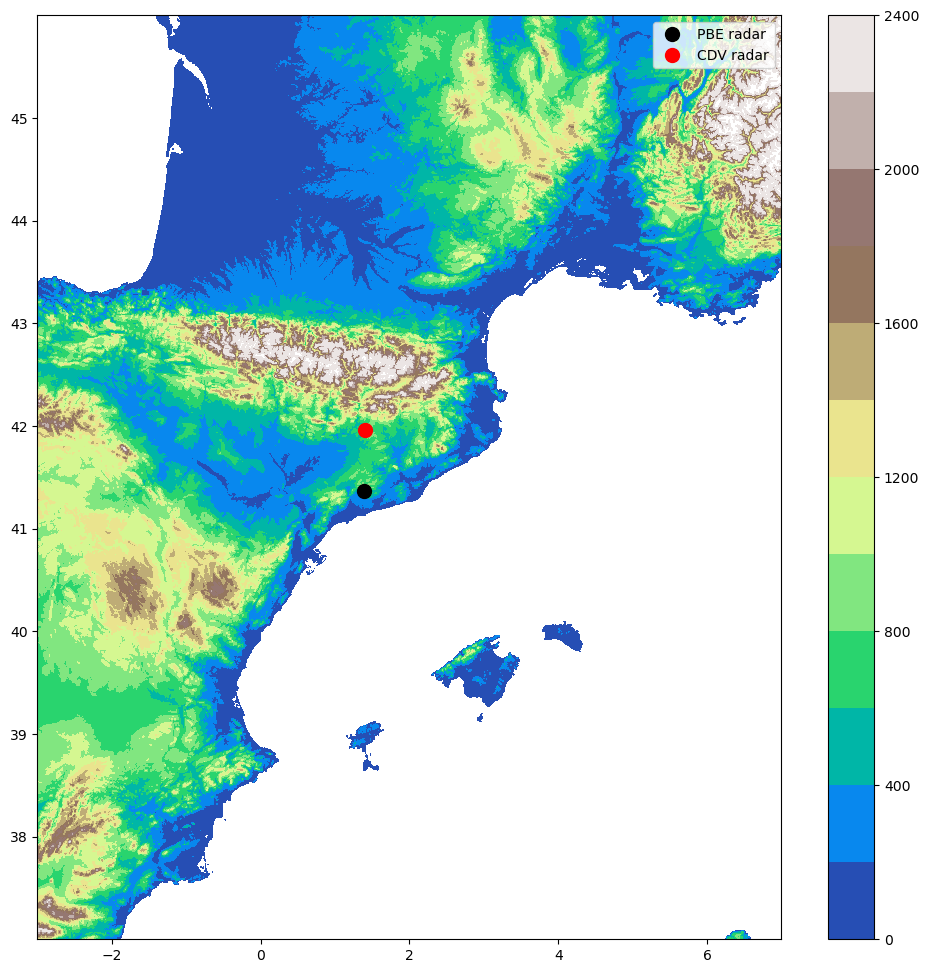

In [43]:
terrain = rasterio.open(file_path)
fig = plt.figure(figsize=(12,12))
plt.contourf(lons, lats, terrain.read(1), cmap='terrain', levels=np.arange(0,2500,200))
plt.colorbar()
plt.plot(1.39, 41.37, "o", markersize=10, color="k", label='PBE radar')
plt.plot(1.4, 41.96, "o", color="r", markersize=10, label='CDV radar')
plt.legend()

### 7. Run SAMURAI

After modifying the parameter file, direct to the parameter file by using the *-params* flags


In [ ]:
!${LROSE_DIR}/samurai -params ./lrose_params/samurai_params 


### 8. Plot SAMURAI results

#### Environment and packages¶
The packages were already imported when we plotted the FRACTL results.

#### Load the netcdf file

In [2]:
inDir_s = "./output_sam/"
file_s = "samurai_XYZ_analysis.nc"
ds_radar_s = xr.open_dataset(inDir_s+file_s).squeeze()
ds_radar_s.load()


<xarray.Dataset>
Dimensions:     (longitude: 51, latitude: 61, altitude: 21)
Coordinates:
  * longitude   (longitude) float32 1.602 1.608 1.614 1.62 ... 1.891 1.897 1.903
  * latitude    (latitude) float32 41.75 41.75 41.76 41.76 ... 42.01 42.02 42.02
  * altitude    (altitude) float32 0.0 0.5 1.0 1.5 2.0 ... 8.0 8.5 9.0 9.5 10.0
    time        datetime64[ns] 2018-01-07T00:54:24
Data variables: (12/53)
    x           (longitude) float32 10.0 10.5 11.0 11.5 ... 33.5 34.0 34.5 35.0
    y           (latitude) float32 10.0 10.5 11.0 11.5 ... 38.5 39.0 39.5 40.0
    U           (altitude, latitude, longitude) float32 nan nan nan ... nan nan
    V           (altitude, latitude, longitude) float32 nan nan nan ... nan nan
    W           (altitude, latitude, longitude) float32 nan nan nan ... nan nan
    WSPD        (altitude, latitude, longitude) float32 nan nan nan ... nan nan
    ...          ...
    DQVDZ       (altitude, latitude, longitude) float32 nan nan nan ... nan nan
    DPDZ        (altitude, latitude, longitude) float32 nan nan nan ... nan nan
    DRHODX      (altitude, latitude, longitude) float32 nan nan nan ... nan nan
    DRHODY      (altitude, latitude, longitude) float32 nan nan nan ... nan nan
    DRHODZ      (altitude, latitude, longitude) float32 nan nan nan ... nan nan
    MCRESIDUAL  (altitude, latitude, longitude) float32 0.8065 0.5258 ... 0.1409

In [3]:
## Get variables:
da_s_DBZ = ds_radar_s['DBZ']
da_s_U = ds_radar_s['U']
da_s_V = ds_radar_s['V']
da_s_W = ds_radar_s['W']
da_s_vort = ds_radar_s['VORT']

lon_s, lat_s = np.meshgrid( ds_radar_s.longitude, ds_radar_s.latitude )

Text(0.5, -0.1, '[dBZ]')

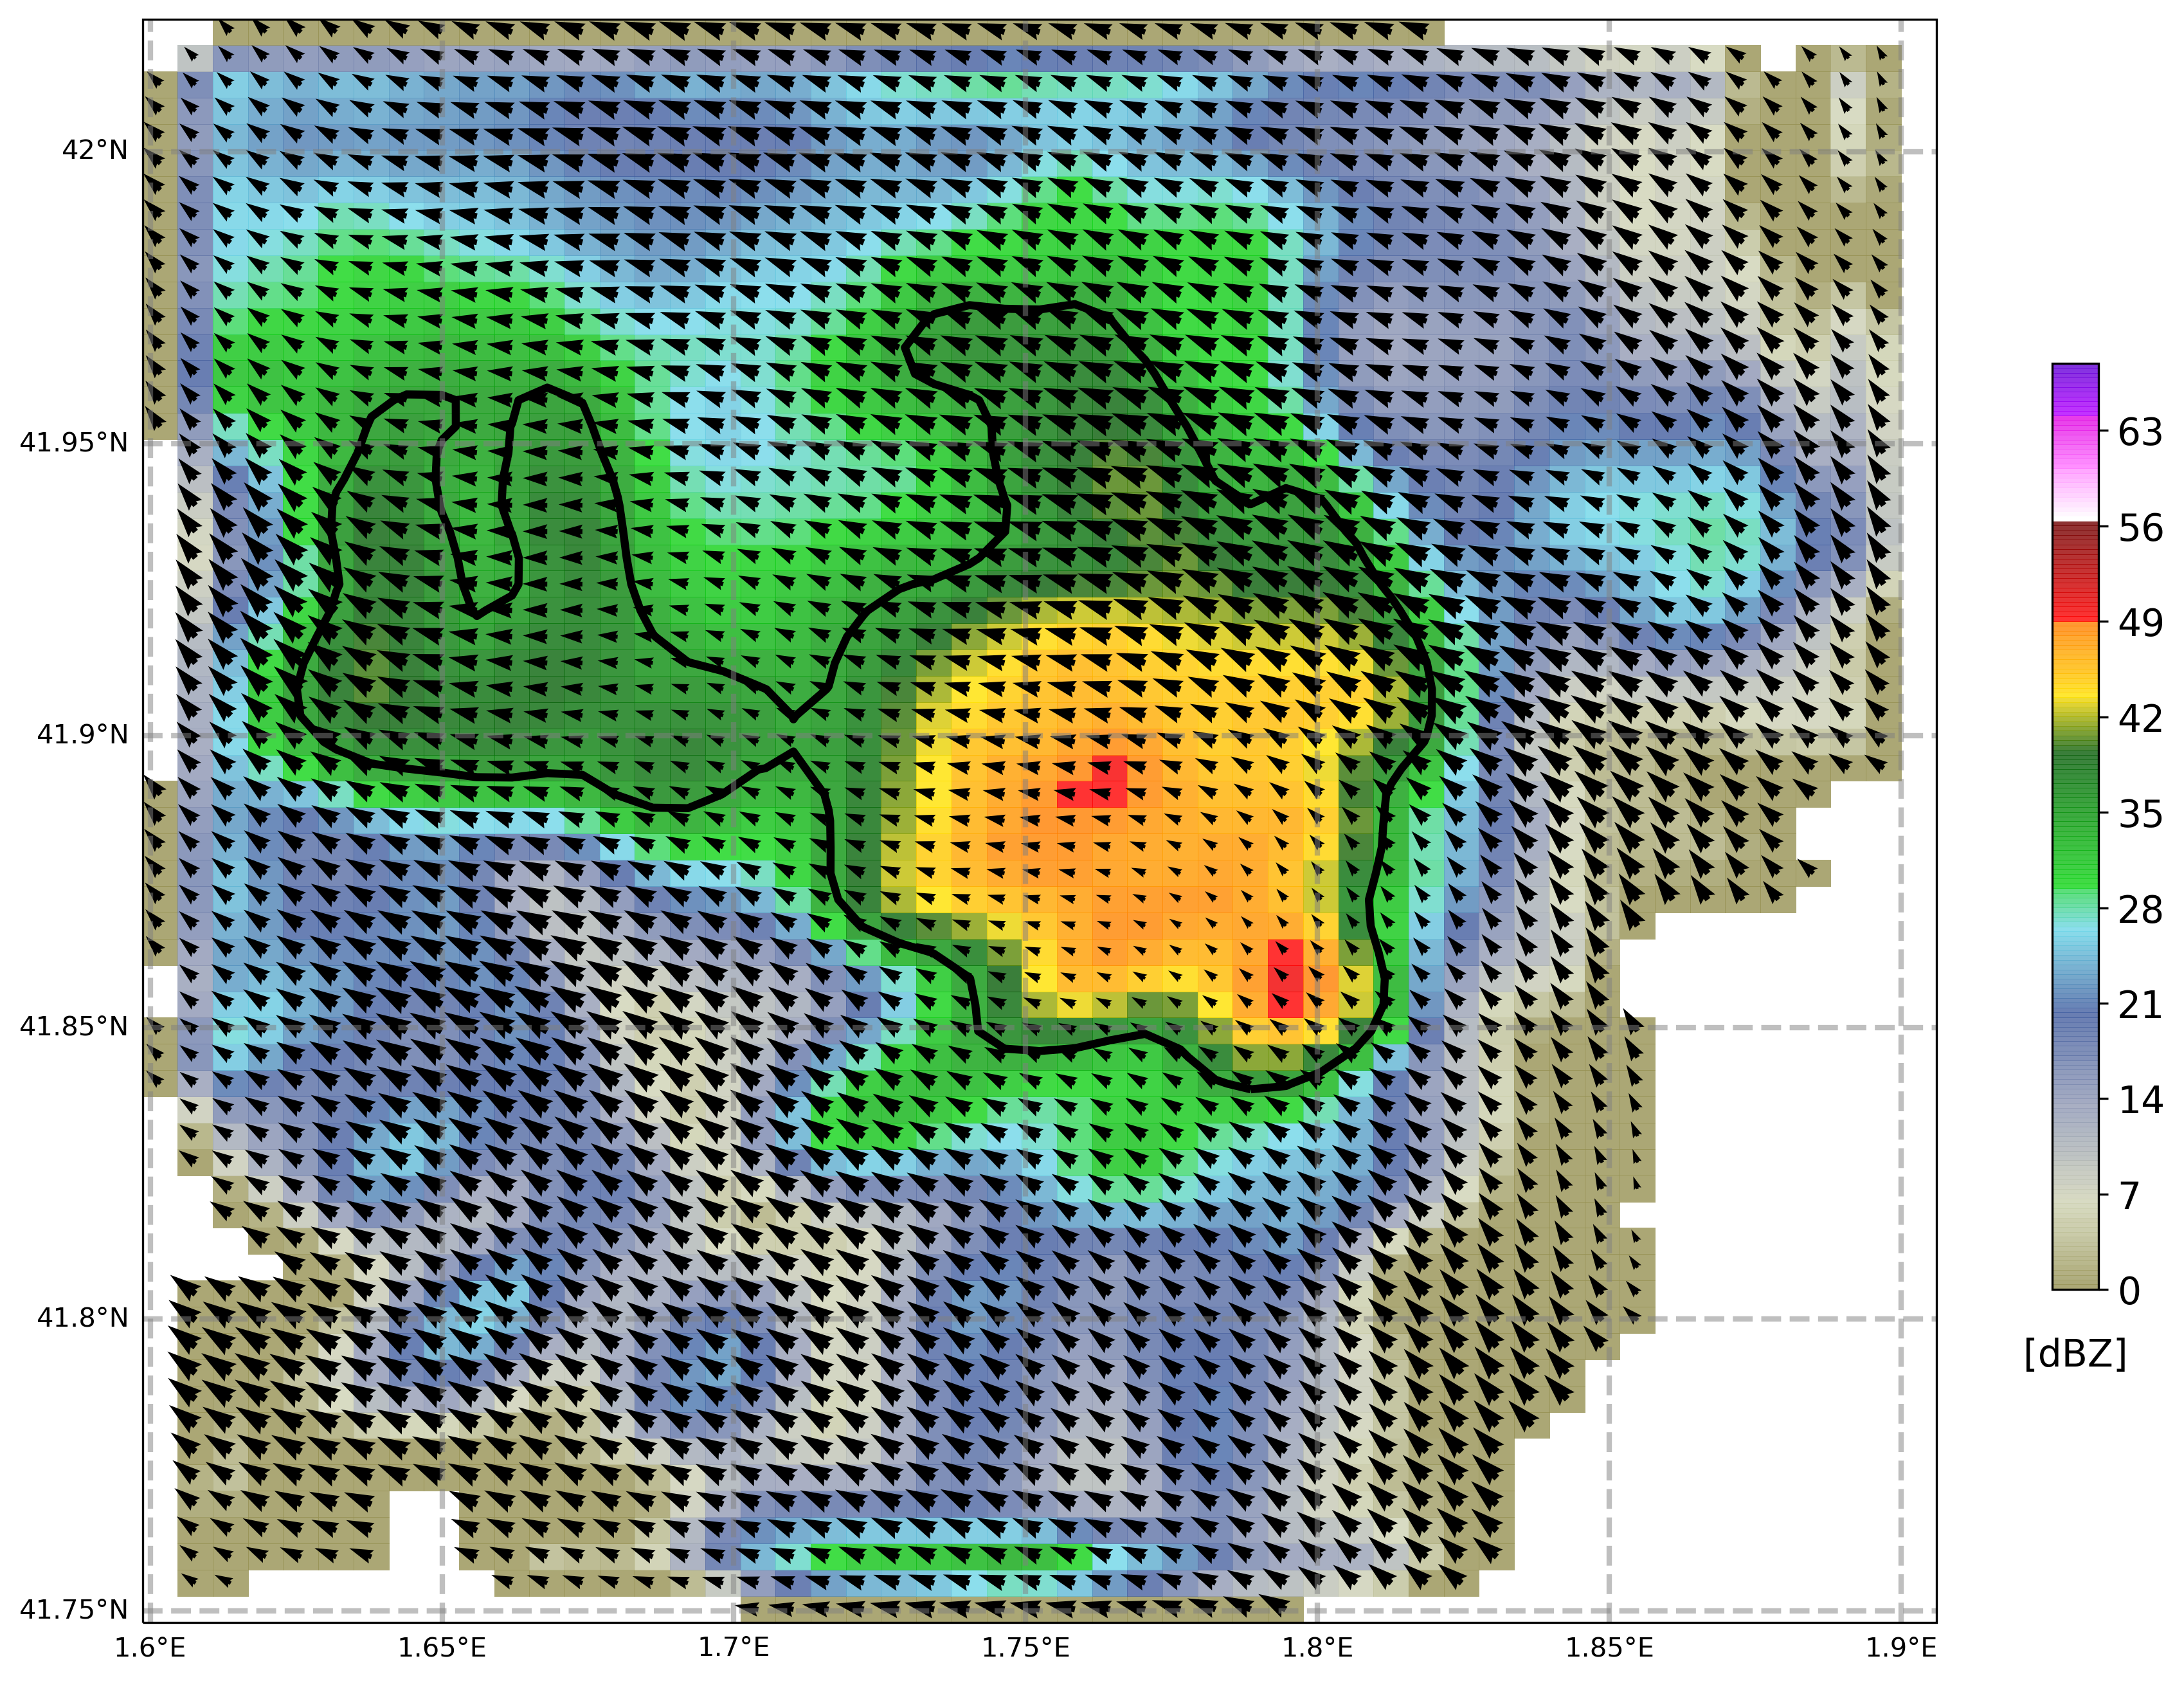

In [26]:
## Set NWS reflectivity colorbar:
ref_norm, ref_cmap = ctables.registry.get_with_steps('NWSStormClearReflectivity', 0, 0.35)
plotting_alt=3.5 # can change to different altitude
plotting_var_s = ds_radar_s.DBZ.sel(altitude=plotting_alt)
plotting_var_u_s = ds_radar_s.U.sel(altitude=plotting_alt).data
plotting_var_v_s = ds_radar_s.V.sel(altitude=plotting_alt).data
plotting_lon_s = ds_radar_s.longitude
plotting_lat_s = ds_radar_s.latitude

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
# stamen_terrain = cimgt.Stamen('terrain')
# ax.add_image(stamen_terrain, 8)
       
cf1 = ax.pcolormesh( plotting_lon_s, plotting_lat_s, plotting_var_s
                    , cmap=ref_cmap, norm=ref_norm
                    , alpha=0.8
                    , shading='auto'
                    , transform=ccrs.PlateCarree() 
                    )
step = 1
cf_q = ax.quiver( plotting_lon_s[::step], plotting_lat_s[::step]
                    , plotting_var_u_s[::step, ::step], plotting_var_v_s[::step, ::step]
                    , scale=1000
                    , width=0.004
                    , color='k'
                    , transform=ccrs.PlateCarree() 
                    )
ax.contour( plotting_lon_s, plotting_lat_s, plotting_var_s, levels=np.arange(35,100,100), colors='k', linewidths=3, 
transform=ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

cbar_ax = fig.add_axes([0.95, 0.3, 0.02, 0.4])
cbar = fig.colorbar(cf1, cax=cbar_ax, fraction=0.04)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_title('[dBZ]', fontsize=14, y=-0.1)


/usr/local/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'shading'
  result = super().contourf(*args, **kwargs)


Text(0.5, -0.1, '[dBZ]')

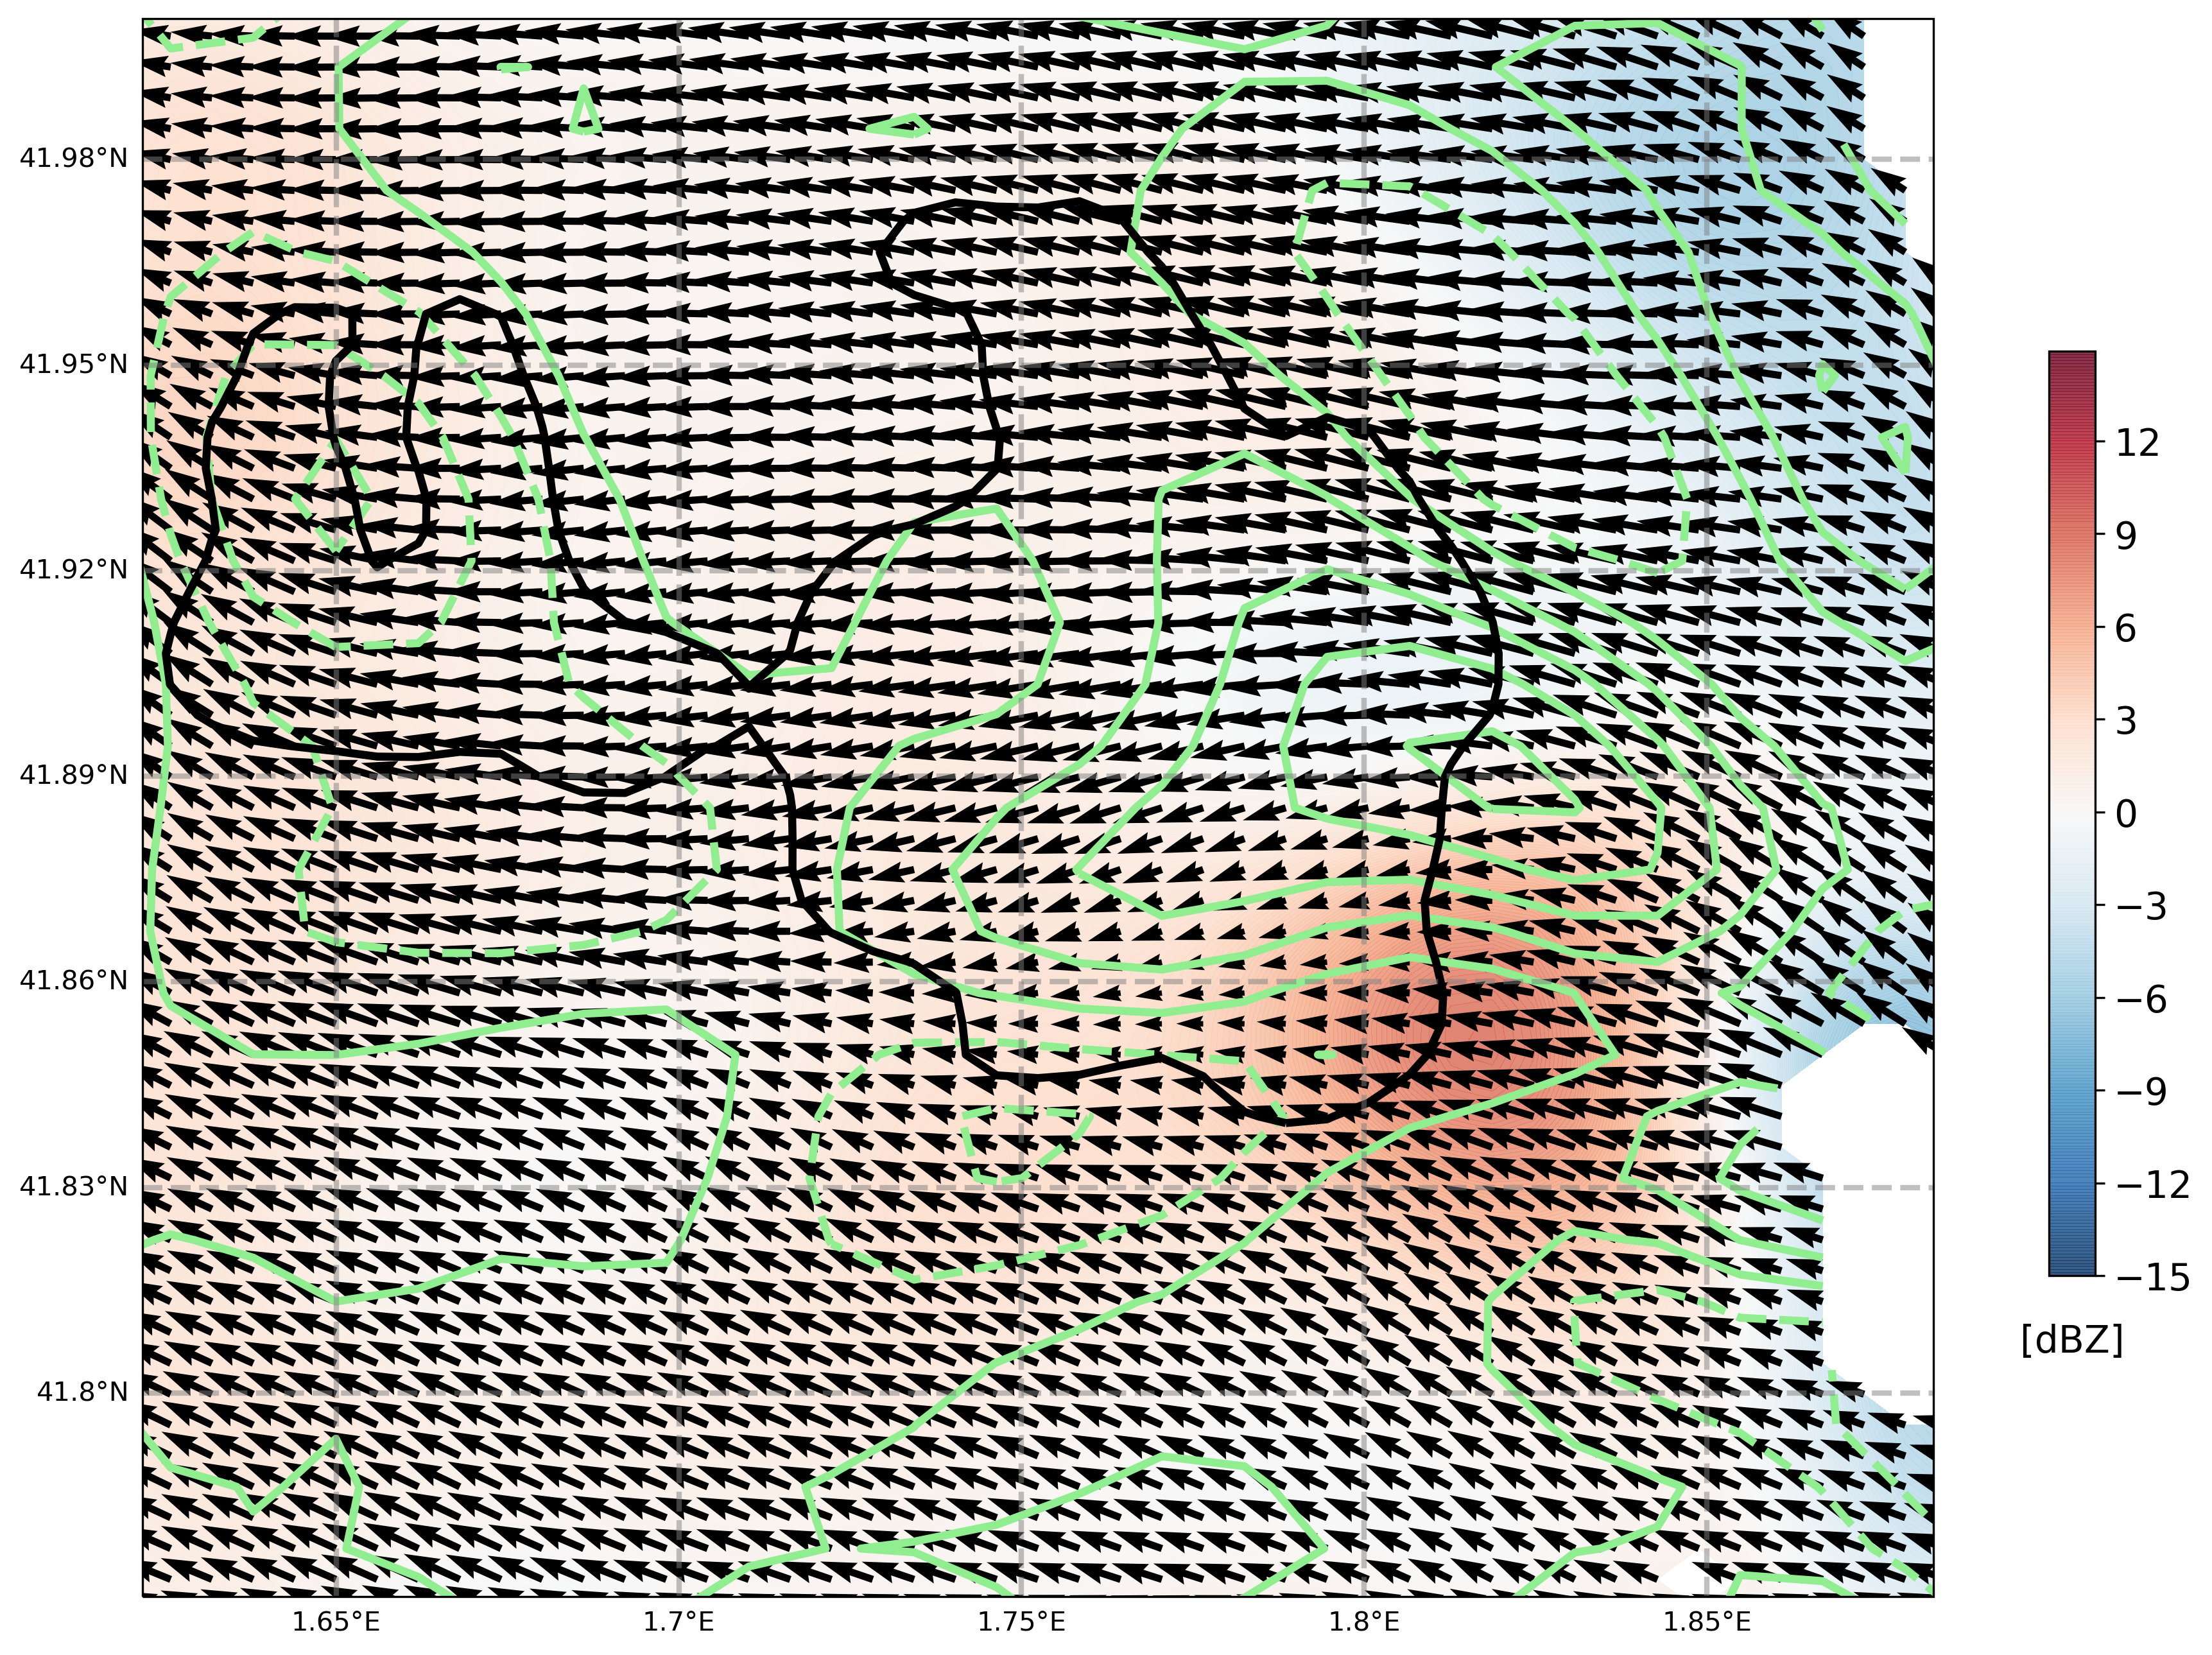

In [27]:
## Set NWS reflectivity colorbar:
plotting_alt=2.5 #altitude at 3 km
plotting_var_s = ds_radar_s.DBZ.sel(altitude=3.5)
plotting_var_u_s = ds_radar_s.U.sel(altitude=plotting_alt).data
plotting_var_v_s = ds_radar_s.V.sel(altitude=plotting_alt).data
plotting_var_w_s = ds_radar_s.W.sel(altitude=plotting_alt).data
plotting_var_vort_s = ds_radar_s.VORT.sel(altitude=plotting_alt).data
plotting_var_div_s = ds_radar_s.DIV.sel(altitude=plotting_alt).data
plotting_lon_s = ds_radar_s.longitude
plotting_lat_s = ds_radar_s.latitude

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
    
ext = 0.02    
ax.set_extent([np.min(lon_s)+ext, np.max(lon_s)-ext, np.min(lat_s)+ext, np.max(lat_s)-ext], crs=ccrs.PlateCarree())
levs_w=np.arange(-15,15,0.1)    
cf1 = ax.contourf( plotting_lon_s, plotting_lat_s, plotting_var_w_s
                    , cmap='RdBu_r'
                    , levels=levs_w
                    , alpha=0.8
                    , shading='auto'
                    , transform=ccrs.PlateCarree() 
                    )

cf = ax.contour( plotting_lon_s[::2], plotting_lat_s[::2], plotting_var_vort_s[::2,::2], transform=ccrs.PlateCarree(), colors='lightgreen', linewidths=3 )
ax.contour( plotting_lon_s, plotting_lat_s, plotting_var_s, levels=np.arange(35,100,100), colors='k', linewidths=3, transform=ccrs.PlateCarree())
step = 1
cf_q = ax.quiver( plotting_lon_s[::step], plotting_lat_s[::step]
                    , plotting_var_u_s[::step, ::step], plotting_var_v_s[::step, ::step]
                    , scale=600
                    , width=0.004
                    , color='k'
                    , transform=ccrs.PlateCarree() 
                    )

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

cbar_ax = fig.add_axes([0.95, 0.3, 0.02, 0.4])
cbar = fig.colorbar(cf1, cax=cbar_ax, fraction=0.04)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_title('[dBZ]', fontsize=14, y=-0.1)

### 9. Apply FRACTL Condition Number

The FRACTL 'Condition Number' represents how well-posed the geometry is for a particular multi-Doppler retrieval. It is similar to the USTD and VSTD field from CEDRIC, which represent the standard deviation of the expected error in the resolved wind field based on the geometry. Since SAMURAI solves for the wind field globally using spline basis functions, it is difficult to calculate this error at each gridpoint. If a FRACTL analysis is run on the same domain, then it can be used to remove regions with poor geometry. Here, we use a value of 10 to threshold the SAMURAI analysis.

In [ ]:
# Read file into radar object
inDir_f = "./output_frac/20180107/"
file_f = "*.nc"
ds_radar_f = xr.open_dataset(inDir_f+file_f).squeeze()
ds_radar_f


In [ ]:
plotting_CN = ds_radar_f.conditionNumber.sel(z0=1.5*1000)


In [ ]:
CN_threshold = 10
dbz_goodcondition = np.where(plotting_CN < CN_threshold, plotting_var_s, np.nan)
u_goodcondition = np.where(plotting_CN < CN_threshold, plotting_var_u_s, np.nan)
v_goodcondition = np.where(plotting_CN < CN_threshold, plotting_var_v_s, np.nan)


In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
       
cf1 = ax.pcolormesh( plotting_lon_s, plotting_lat_s, dbz_goodcondition
                    , cmap=ref_cmap, norm=ref_norm
                    , alpha=0.8
                    , shading='auto'
                    , transform=ccrs.PlateCarree() 
                    )
step = 4
cf_q = ax.quiver( plotting_lon_s[::step], plotting_lat_s[::step]
                    , u_goodcondition[::step, ::step], v_goodcondition[::step, ::step]
                    , scale=1000
                    , width=0.004
                    , color='k'
                    , transform=ccrs.PlateCarree() 
                    )

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

cbar_ax = fig.add_axes([0.95, 0.3, 0.02, 0.4])
cbar = fig.colorbar(cf1, cax=cbar_ax, fraction=0.04)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_title('[dBZ]', fontsize=14, y=-0.1)


### Congratulations! You have successfully completed the LROSE Wind tutorial. There are other options to set in both FRACTL and SAMURAI, but the steps and parameters in this tutorial can produce a good quality wind field in many cases. Be critical with your own analysis and feel free to reach out to the LROSE team for questions as you analyze your own data.

# Appendix - additional SAMURAI parameters

The following are optional parameters:
---
* **BACKGROUND SECTION**
    * load_background [line 107]
        * TRUE: A first guess of the analysis stored in the <code lang="bash">samurai_Background.in</code> will be loaded. This can come from a model, sounding, or other data source if available. Most of the time it is not available so it should be set to FALSE.
        * FALSE (default setting)
    * adjust_background [line 132]
        * TRUE: the background will be adjusted to satisfy the mass continuity and match the supplied data using a variational adjustment. Without this, it is just interpolated simply to the grid. 
* **OPERATION SECTION**
    * mode [line 170]: The default mode is MODE_XYZ, which is Cartesian grid. You can run in cylindrical mode with MODE_RTZ. Stay tuned for more radar centric RTZ mode in the near future!
    * preprocess_obs [line 219]
        * TRUE: the raw data files will be preprocessed according to their file suffixes, and a <code lang="bash">samurai_Observations.in</code> file will be generated.
        * FALSE: SAMURAI will load the observations from the <code lang="bash">samurai_Observations.in</code> file located in the data_directory. This is useful for generating fake data, or for saving some time if you already ran the preprocessing of lots of files.
    * num_iterations [line 232]: SAMURAI has the ability to take the output analysis and use it as a first guess for another analysis. This can be useful to create a 'coarse' analysis, followed by a 'fine' analysis. It is very important to set the observation and background errors appropriately if you choose this option.
* **BACKGROUND SECTION**
    * ref_state [line 380]: a sounding file to define the hydrostatic reference state used in the analysis. The default is the Dunion (2011) moist tropical sounding file. The analysis is generally not sensitive to this sounding, as it is just used to provide a reference density field and fall speed relationships in most cases. If you are analyzing thermodynamic information or have a very different freezing level it may be useful to provide a more appropriate sounding. The file format is similar to that of WRF or CM1 idealized soundings.
    * i_background_roi [line 402], j_background_roi [line 412]: These set the background radius of influence when loading a background field.
* **RADAR SECTION**
    * qr_variable [line 452]: In the default 'dbz' mode, the reflectivity is just interpolated and not included in the cost function minimization. If this is set to 'qr', then reflectivity is converted to liquid water using Z-M relationships defined in Gamache et al. (1993) and used as an additional variable in the cost function minimization. This is useful if you have other liquid water measurements to assimilate. Since this is a relatively simple Z-M it should be used with caution. 
    * dbz_pseudow_weight [line 516]: SAMURAI has the ability to set a 'soft' w=0 boundary condition at echo top, and setting this weight will determine how soft or hard that constraint is enforced. Usually a hard w=0 is enforced via the spline boundary conditions at the bottom and top of the domain, so this is optional. It can be useful if the vertical velocities are believed to be too strong at the top of the cloud.
    * melting_zone_width [line 532], mixed_phase_dbz [line 540], rain_dbz [line 548]: SAMURAI has some basic terminal fall speed corrections that use reflectivity and Z-VT relationships. These parameters control which relationships are used depending on dbz and the height of the zero C level (which is determined from the reference sounding).
* **BOUNDARY CONDITIONS SECTION**

Available options are R0, R1T0, R1T1, R1T2, R2T10, R2T20, R3, and PERIODIC following Ooyama (2002). The default "non"- boundary condition (R0) adds a buffer set of gridpoints that are used to calculate the solution but are discarded for output. Different boundary conditions can be set on the left (L) or right (R) side of the domain for each variable and dimension. The most common option other than R0 would be R1T0 for vertical velocity (rhow = 0) at the surface and/or domain top. Periodic domains are only valid for the i and j dimension, but are available in both the XYZ and RTZ mode. Improved boundary conditions are currently in development.
* **OBSERVATION ERRORS SECTION**

Specified error is given in terms of a standard deviation, and is fixed for all observations from a particular instrument except radar. In the radar case, the spectrum width and elevation angle (proportional to terminal fall speed contribution) are used to define the error for each radar gate. A minimum error (radar_min_error) is also enforced.
* **ITERATION DEPENDENT SECTION**
    * mc_weight [line 1450]: specify the weight given to the mass continuity constraint. Default is set to 1, and is generally not recommended to change unless you have a good reason.
    * i_filter_length [line 1546], j_filter_length [line 1558], k_filter_length [line 1570]
     - Gaussian recursive filter is a low-pass filter. Smaller filter lengths retain more detail, and larger filter lengths smooth more. The general recommendation is 4, 4, 2, which removes features less than approximately 4dx, 4dy, and 2dz from the analysis.
    * i_spline_cutoff [line 1582], j_spline_cutoff [line 1594], k_spline_cutoff [line 1606]
     - Spline cutoff is implemented as a third derivative constraint on the cubic B-spline basis during the spline transform. It is a sharper filter than the Gaussian, roughly equivalent to a sixth order filter.
    * i_max_wavenumber [line 1618], j_max_wavenumber [line 1630], k_max_wavenumber [line 1642]
     - The Fourier spectral filter is the sharpest filter. It can be used for desired effects, such as explicitly removing high-wavenumber features in the spectral domain (usually for RTZ analysis), or for producing a 'mean' field by restricting to wavenumber zero.